In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("zomato.csv")
df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [6]:
df.keys()

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
df.drop(["url","address","phone","menu_item","reviews_list","dish_liked"],axis=1,inplace=True)

In [10]:
df.shape

(51717, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [12]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(51609, 11)

# cleaning rate columns

In [16]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
def handleRate(value):
    if (value == "NEW" or value == "-"):
        return np.nan
    else:
        value = str(value).split("/")
        value = value[0]
        return float(value)

In [19]:
df["rate"] = df["rate"].apply(handleRate)
df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [20]:
df.rate.fillna(df["rate"].mean(),inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [24]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [26]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [27]:
df.drop(columns='listed_in(city)',inplace=True)

In [38]:
df.Cost2plates.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [37]:
def handleComma(value):
    value = str(value)
    if "," in value:
        value = value.replace(",", "")
    return float(value)

df["Cost2plates"] = df["Cost2plates"].apply(handleComma)

In [42]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

# cleaning rest_type columns

In [43]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [44]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [45]:
def handle_rest_type(value):
    if( value in rest_types_lessthan1000):
        return "other"
    return value

df["rest_type"] = df["rest_type"].apply(handle_rest_type)
df["rest_type"].unique()

array(['Casual Dining', 'other', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bakery', 'Takeaway, Delivery',
       'Casual Dining, Bar'], dtype=object)

# location handle and cleaning

In [50]:
location = df.location.value_counts(ascending=False)

In [51]:
location_less_300 = location[location<300]

In [52]:
def handle_location(value):
    if (value in location_less_300):
        return "other"
    return value

In [54]:
df["location"] = df.location.apply(handle_location)
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'other', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'HSR',
       'Marathahalli', 'Shanti Nagar', 'Koramangala 5th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'St. Marks Road',
       'Cunningham Road', 'Commercial Street', 'Domlur', 'Ejipura',
       'Malleshwaram', 'Kammanahalli', 'Koramangala 6th Block',
       'Brookefield', 'Rajajinagar', 'Banaswadi', 'Kalyan Nagar',
       'New BEL Road'], dtype=object)

# Cleaning Cuisines columns

In [55]:
df.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [56]:
cuisines = df.cuisines.value_counts(ascending=False)
cuisines_less_100 = cuisines[cuisines<100]

def handle_cuisines(value):
    if (value in cuisines_less_100):
        return "other"
    return value

In [61]:
df["cuisines"] = df.cuisines.apply(handle_cuisines)
df.cuisines.unique(),df.cuisines.value_counts()

(array(['North Indian, Mughlai, Chinese', 'other',
        'South Indian, North Indian', 'North Indian', 'Cafe',
        'Cafe, Continental', 'Cafe, Fast Food', 'Cafe, Bakery',
        'Bakery, Desserts', 'Pizza', 'Biryani',
        'North Indian, Chinese, Fast Food', 'Chinese, Thai, Momos',
        'South Indian', 'Burger, Fast Food', 'Pizza, Fast Food',
        'North Indian, Chinese', 'Chinese, Thai', 'Ice Cream, Desserts',
        'Biryani, Fast Food', 'Fast Food, Burger', 'Desserts, Beverages',
        'Chinese', 'Bakery', 'Biryani, South Indian', 'Fast Food',
        'South Indian, Chinese, North Indian', 'Mithai, Street Food',
        'South Indian, Chinese', 'Biryani, North Indian, Chinese',
        'Desserts', 'Ice Cream', 'South Indian, North Indian, Chinese',
        'South Indian, Biryani', 'Beverages', 'Mithai',
        'North Indian, Street Food', 'Chinese, North Indian',
        'South Indian, North Indian, Chinese, Street Food', 'Andhra',
        'Italian, Pizza', 'Stre

In [62]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other,other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet


In [66]:
df.select_dtypes(include="number").columns

Index(['rate', 'votes', 'Cost2plates'], dtype='object')

# Data is cleaning let's jump to visualization

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

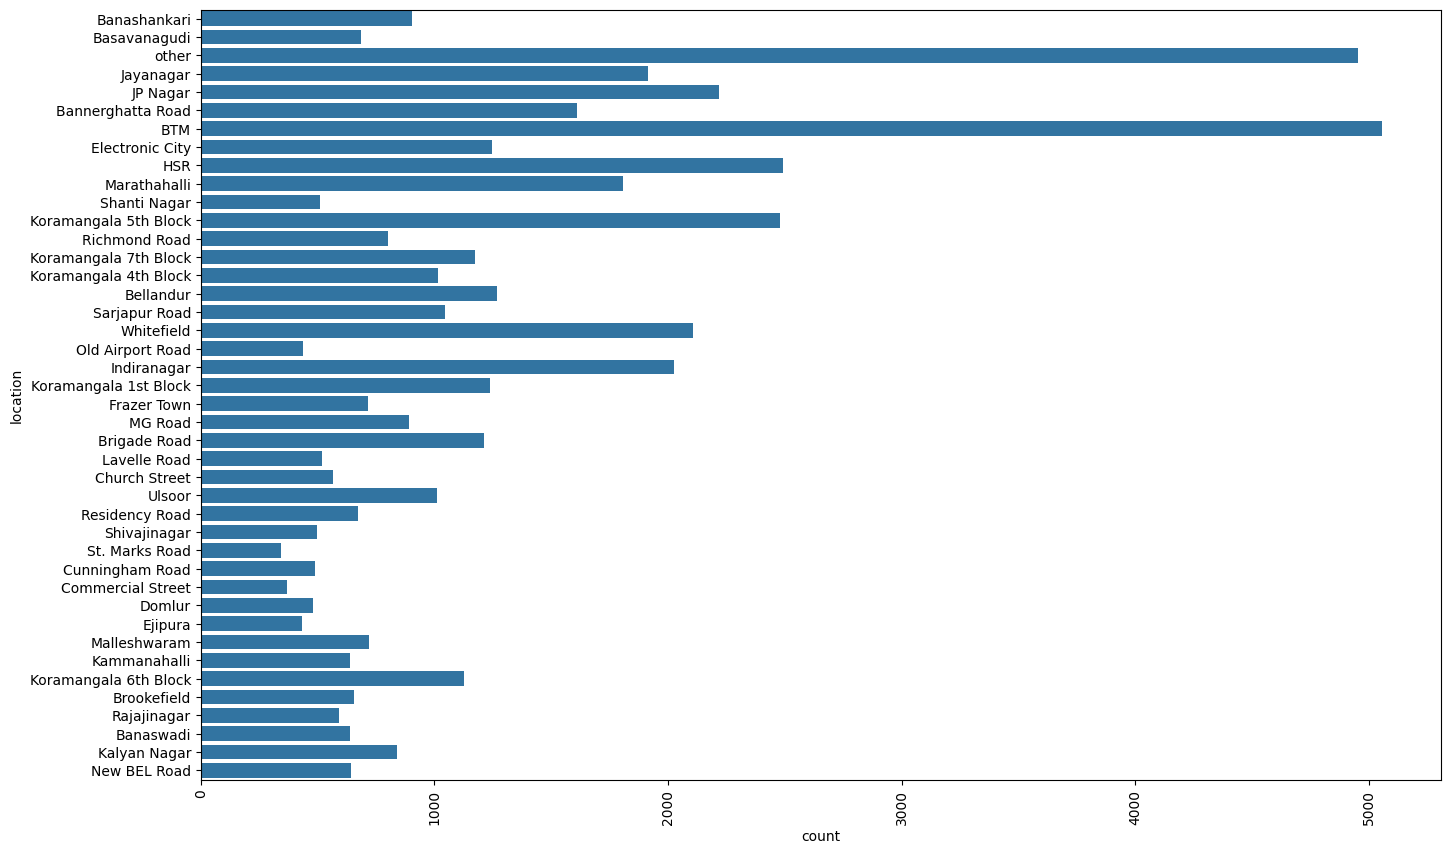

In [70]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['location'])
plt.xticks(rotation=90)

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\2834006886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='location', palette='viridis')


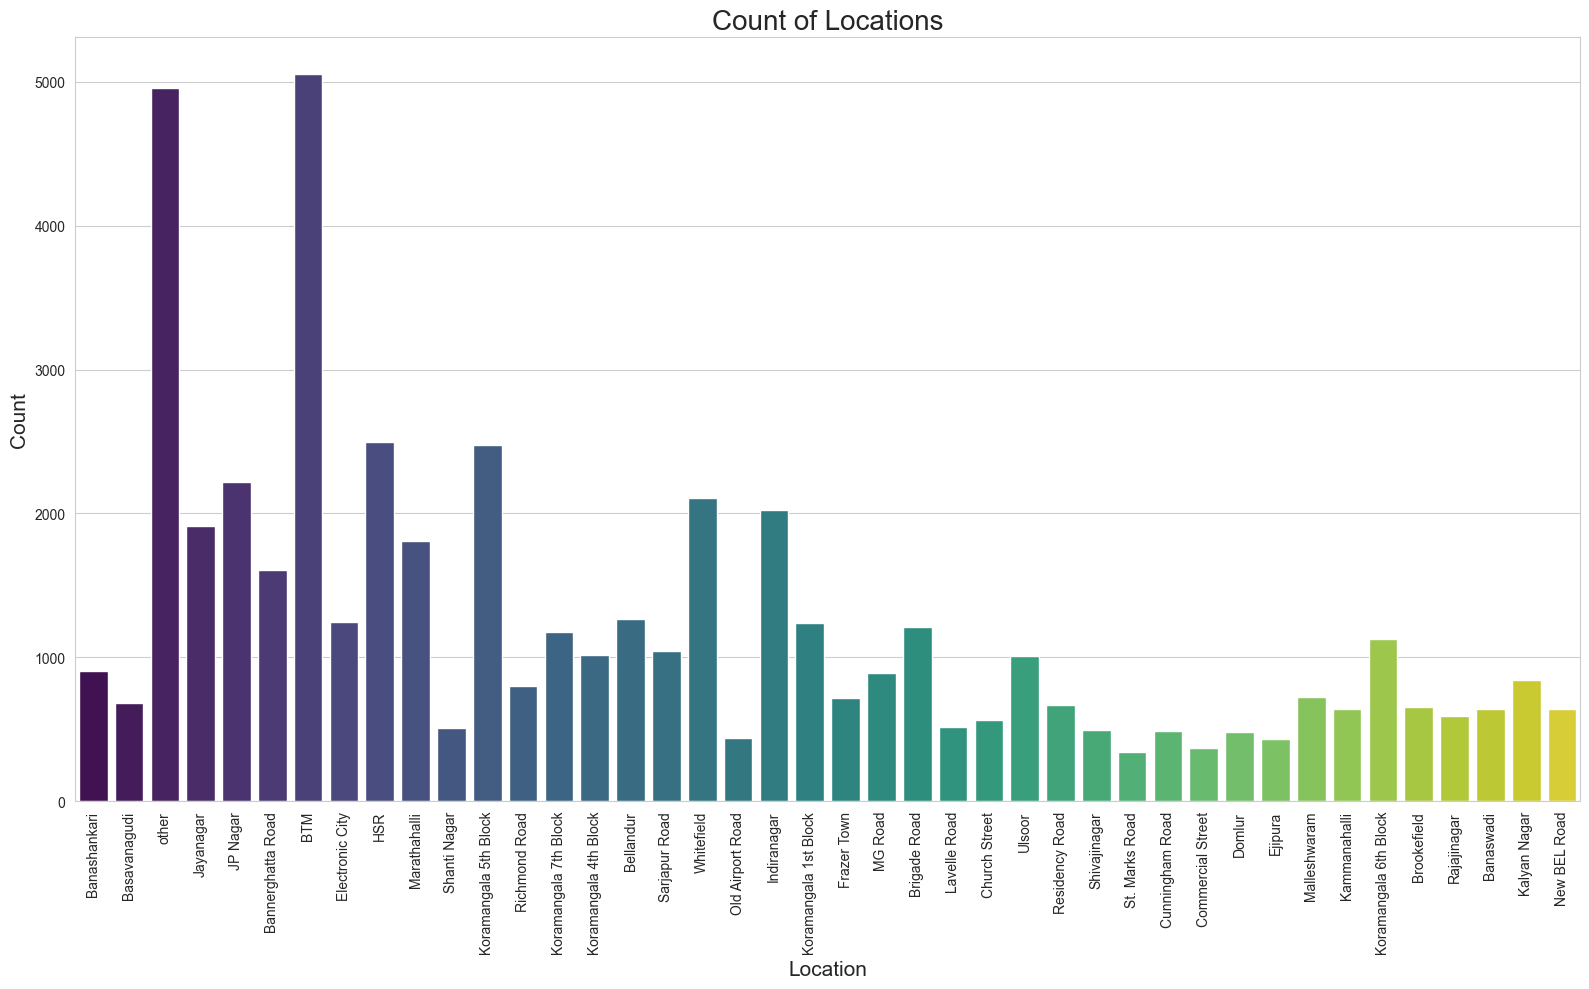

In [108]:
plt.figure(figsize=(16, 10))
ax = sns.countplot(data=df, x='location', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Locations', fontsize=20)
plt.xlabel('Location', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')  # Change filename and format as needed
plt.show()

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\3812901872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='online_order', palette='inferno')


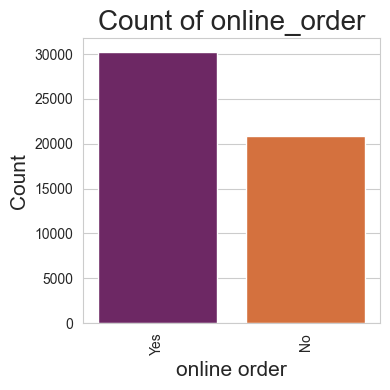

In [109]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x='online_order', palette='inferno')
plt.xticks(rotation=90)
plt.title('Count of online_order', fontsize=20)
plt.xlabel('online order', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()
plt.savefig('counts of online orders.png', dpi=300, bbox_inches='tight')  # Change filename and format as needed
plt.show()

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\4195968432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='book_table', palette='rainbow')


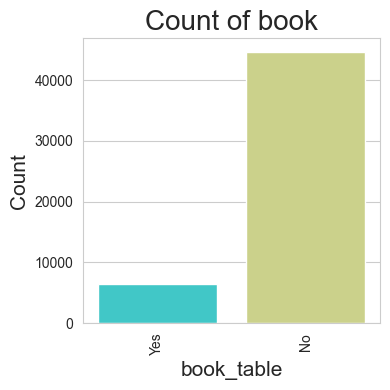

In [110]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x='book_table', palette='rainbow')
plt.xticks(rotation=90)
plt.title('Count of book', fontsize=20)
plt.xlabel('book_table', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()
plt.savefig('count of book table.png', dpi=300, bbox_inches='tight')  # Change filename and format as needed
plt.show()

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\1629139316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = df,palette="rainbow")


<Axes: xlabel='online_order', ylabel='rate'>

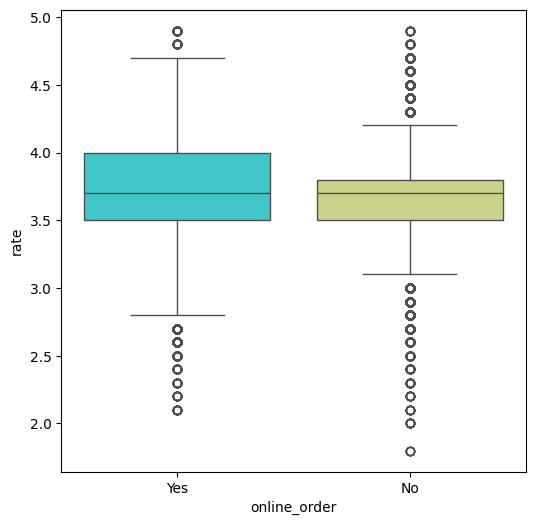

In [79]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df,palette="rainbow")

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\3027377961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'book_table', y = 'rate', data = df,palette="inferno")


<Axes: xlabel='book_table', ylabel='rate'>

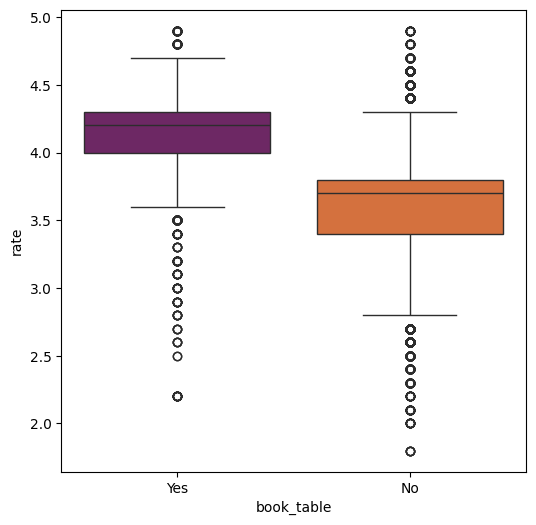

In [80]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df,palette="inferno")

In [82]:
df1 = df.groupby(["location","online_order"])["name"].count()
df1.to_csv("location_online_order.csv")

In [83]:
df1 = pd.read_csv("location_online_order.csv")

In [84]:
df1 = pd.pivot_table(df1,values=None,index=["location"],columns=["online_order"],fill_value=0,aggfunc=np.sum)
df1

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\290168525.py:1: FutureWarning: The provided callable <function sum at 0x000001E1D3C6E020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1,values=None,index=["location"],columns=["online_order"],fill_value=0,aggfunc=np.sum)


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
other                  2064  2890

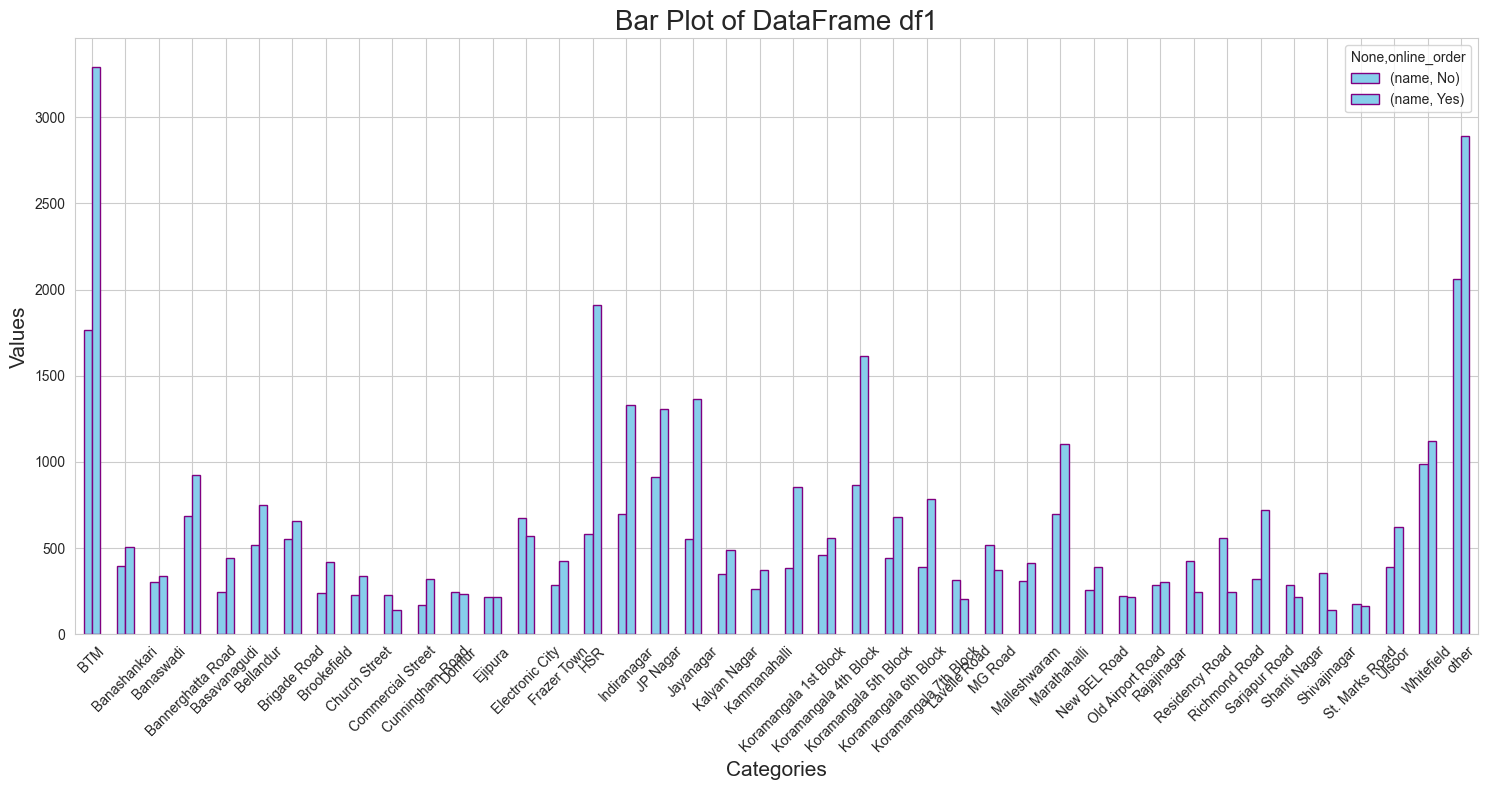

In [111]:
sns.set_style('whitegrid')

# Create the bar plot
ax = df1.plot(kind='bar', figsize=(15, 8), color='skyblue', edgecolor='purple')

# Add title and labels
plt.title('Bar Plot of DataFrame df1', fontsize=20)
plt.xlabel('Categories', fontsize=15)  # Adjust 'Categories' to your specific x-axis label
plt.ylabel('Values', fontsize=15)       # Adjust 'Values' to your specific y-axis label

# Improve layout
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()        # Adjust layout to make room for rotated labels
plt.savefig('Locations value.png', dpi=300, bbox_inches='tight')  # Change filename and format as needed

# Show the plot
plt.show()

In [91]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\814380054.py:4: FutureWarning: The provided callable <function sum at 0x000001E1D3C6E020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)


name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
other                  4587  367

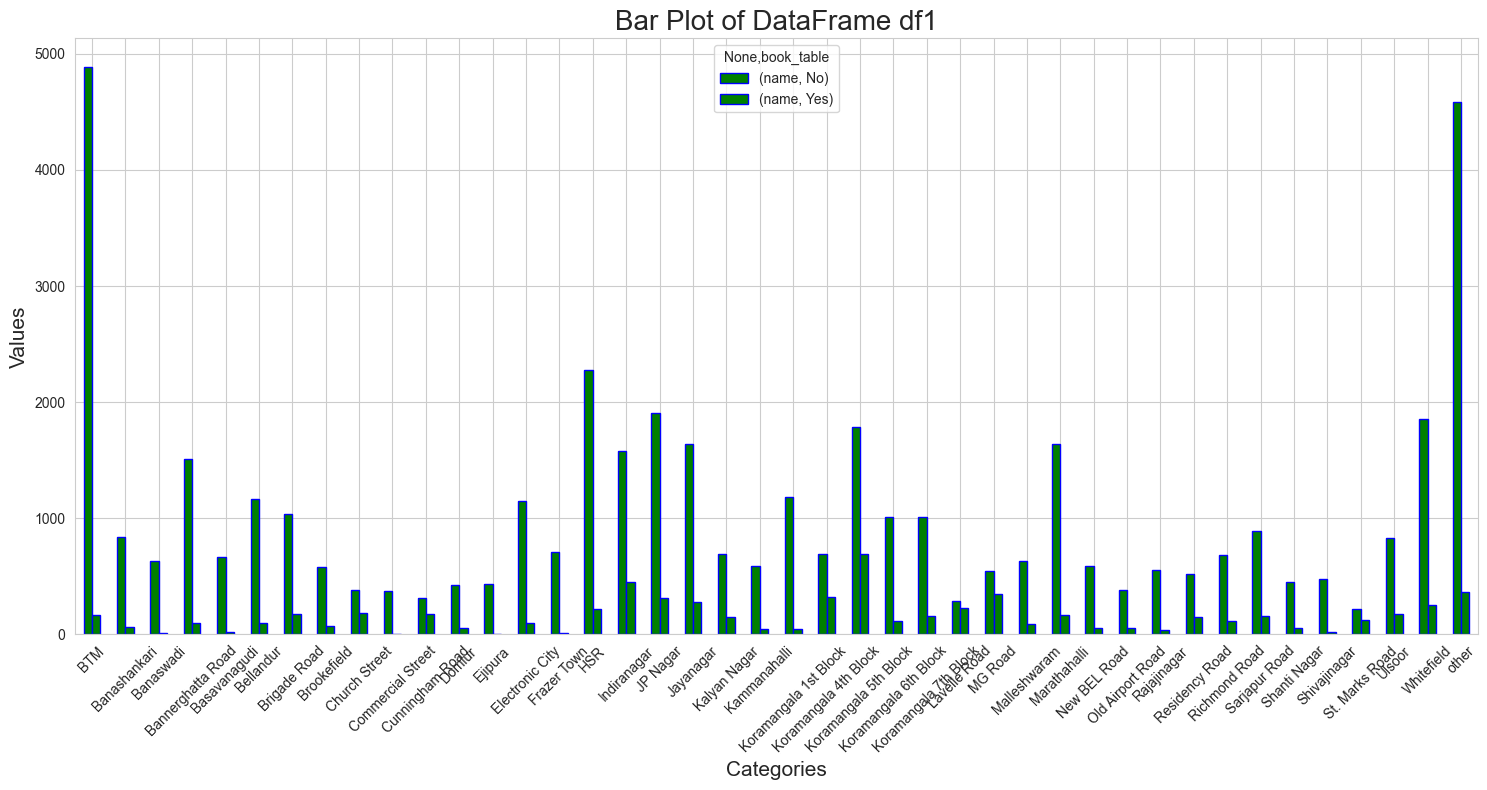

In [112]:
sns.set_style('whitegrid')
ax = df2.plot(kind='bar', figsize=(15, 8), color='green', edgecolor='blue')
plt.title('Bar Plot of DataFrame df1', fontsize=20)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('location vs booktable.png', dpi=300, bbox_inches='tight')  # Change filename and format as needed
plt.show()

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\3954847881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'rainbow')


<Axes: xlabel='Type', ylabel='rate'>

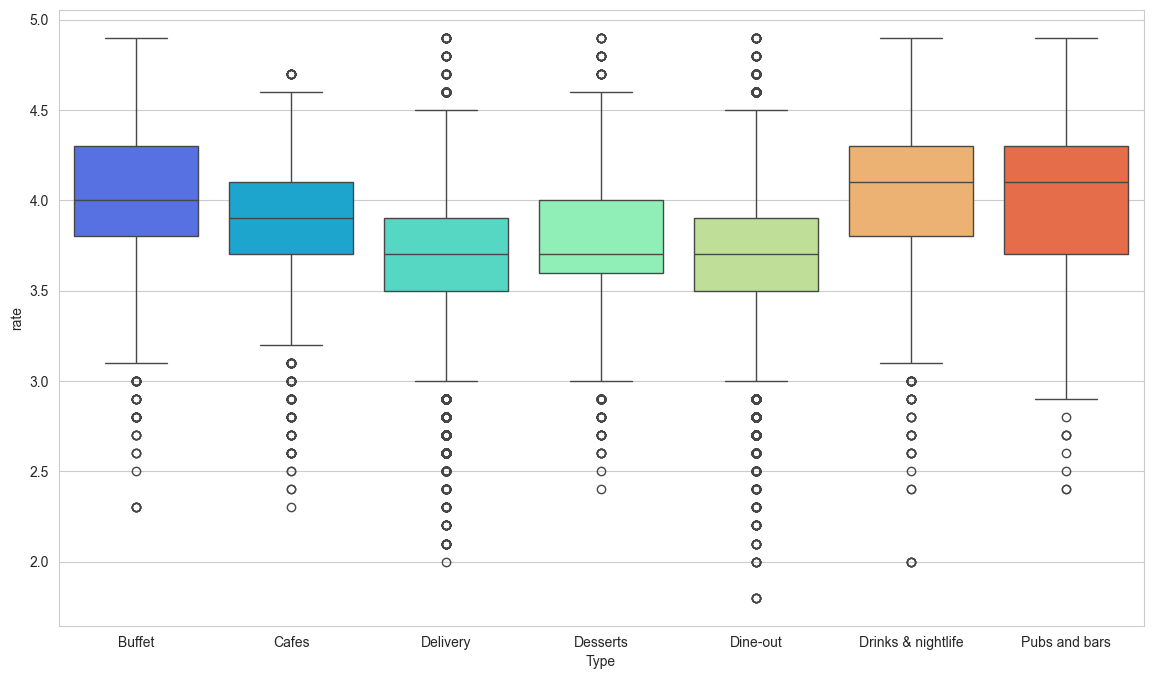

In [97]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'rainbow')

In [98]:
df3 = df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\1140243432.py:4: FutureWarning: The provided callable <function sum at 0x000001E1D3C6E020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)


name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
other                     83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

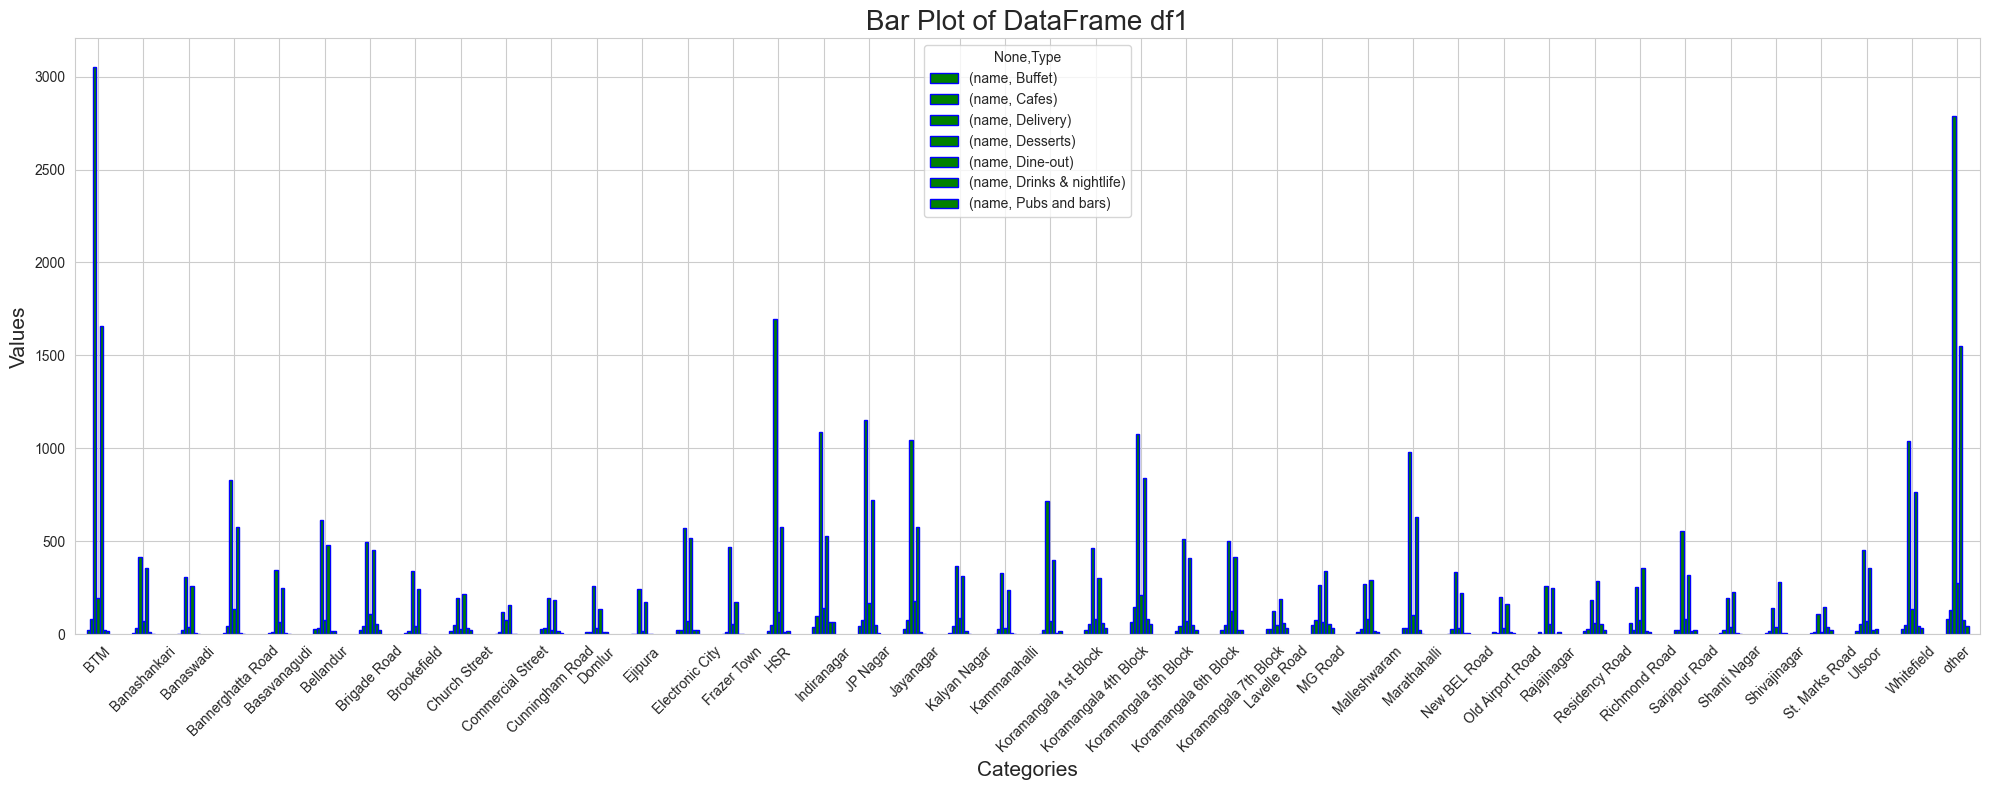

In [113]:
sns.set_style('whitegrid')
ax = df3.plot(kind='bar', figsize=(20, 8), color='green', edgecolor='blue')
plt.title('Bar Plot of DataFrame df1', fontsize=20)
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('location,type with name counts.png', dpi=300, bbox_inches='tight')  # Change filename and format as needed

plt.show()

In [101]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\2400356857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df5.index, y=df5['votes'], palette='viridis')


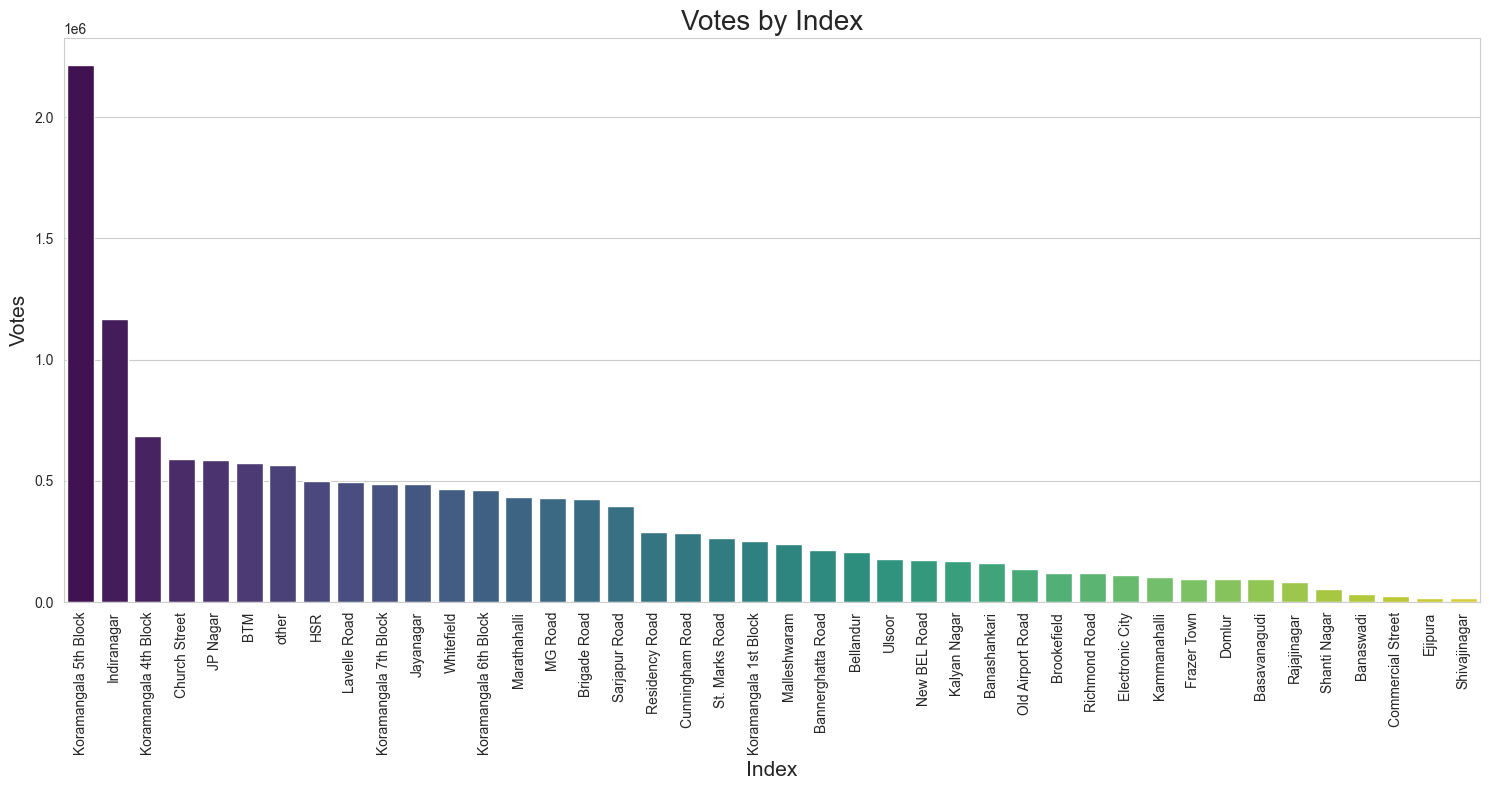

In [114]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.barplot(x=df5.index, y=df5['votes'], palette='viridis')
plt.title('Votes by Index', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Votes', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('location with votes.png', dpi=300, bbox_inches='tight')  # Change filename and format as needed

plt.show()

In [105]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
other,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\4230242000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df7.index, y=df7['votes'], palette='coolwarm')


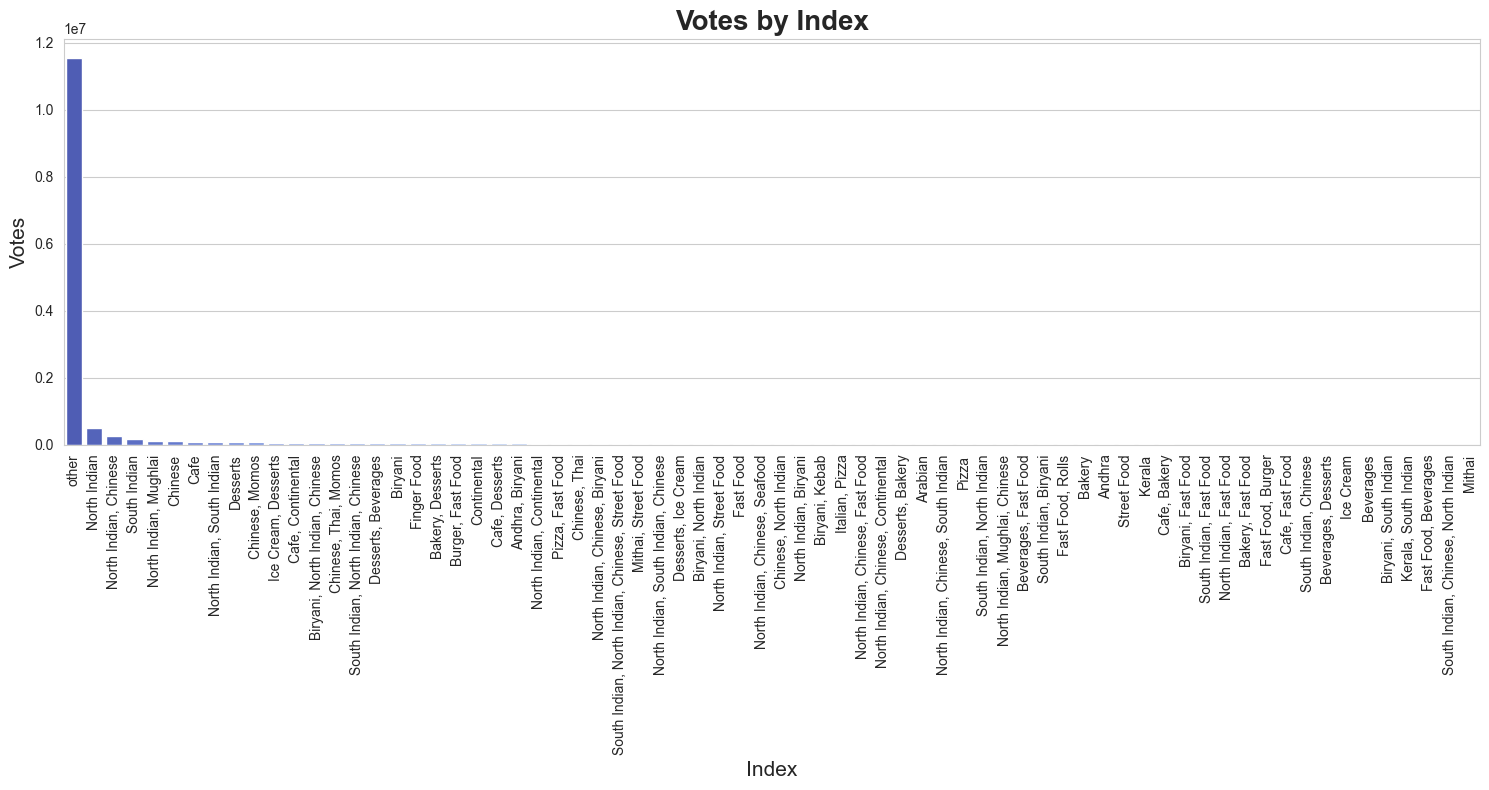

In [115]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.barplot(x=df7.index, y=df7['votes'], palette='coolwarm')
plt.title('Votes by Index', fontsize=20, fontweight='bold')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Votes', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('cuisine with votes.png', dpi=300, bbox_inches='tight')  # Change filename and format as needed

plt.show()

C:\Users\Suren\AppData\Local\Temp\ipykernel_4008\1645614891.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df7.index, y=df7['votes'], palette='coolwarm')


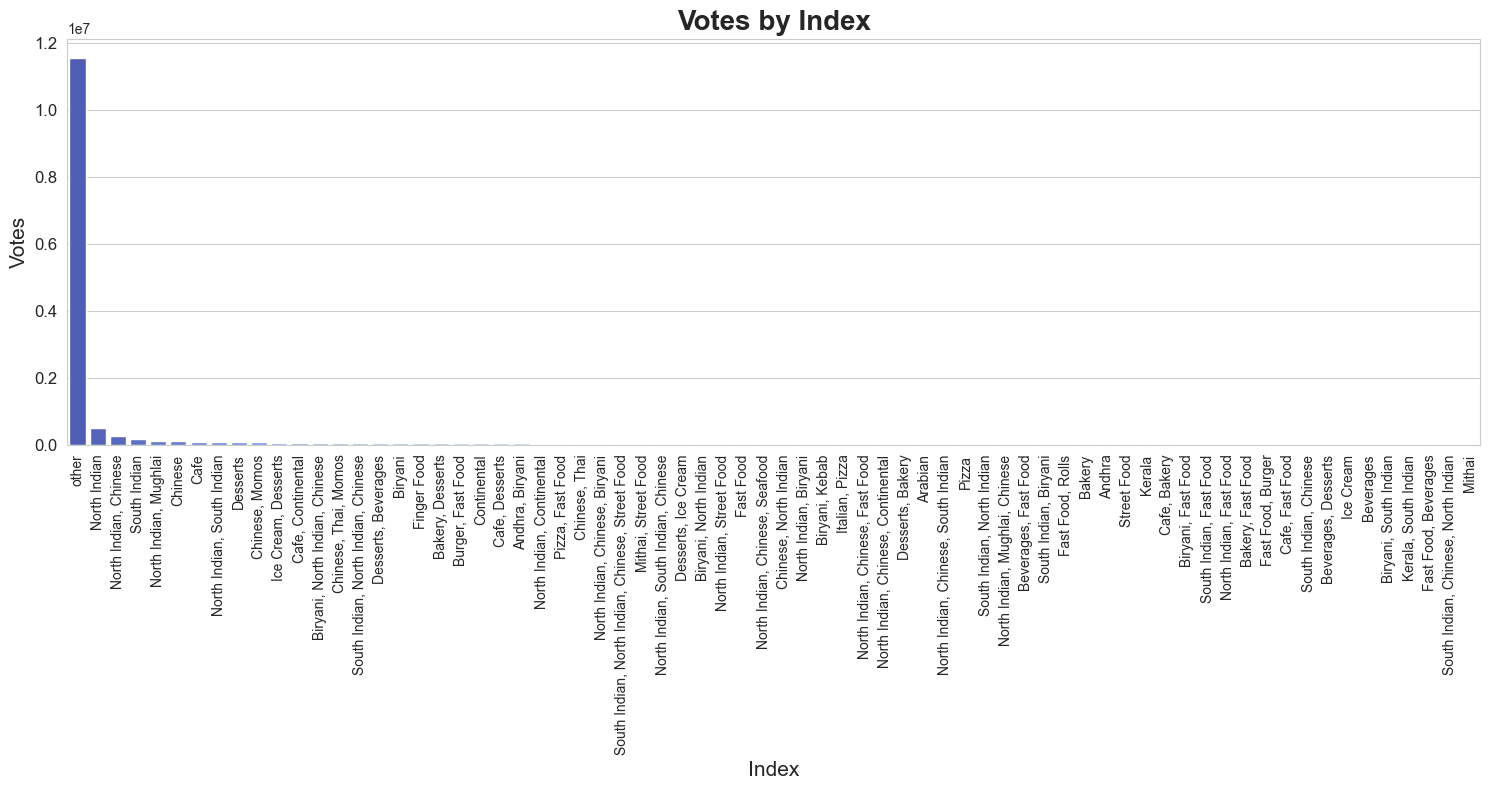

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_style('whitegrid')

# Create the figure
plt.figure(figsize=(15, 8))

# Create the bar plot with appropriate x and y parameters
sns.barplot(x=df7.index, y=df7['votes'], palette='coolwarm')

# Add title and labels
plt.title('Votes by Index', fontsize=20, fontweight='bold')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Votes', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show y-axis numbers clearly
plt.yticks(fontsize=12)  # Adjust the font size of y-axis ticks if needed

# Improve layout
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Show the plot
plt.show()
